## Useful imports

In [60]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns, scipy as sp

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score, StratifiedKFold

import torch, torch.nn as nn, torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader

## Charging the csv in a dataframe

First step is to take a look at the data to know what we are dealing with.

We charge the csv in a panda dataframe and apply multiple methods to visualize the data.

A quick search to the source of the data (https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset?select=diabetes_binary_health_indicators_BRFSS2015.csv) gives us the information on the meaning of the data and precisions on the features.

In [61]:
data_diabetes = "C:/Users/augus/projet-ml/data/diabetes_binary_health_indicators_BRFSS2015.csv"
df = pd.read_csv(data_diabetes)
df

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


253680 different patients and 22 features.

Most of the features are binary : 1.0 if true and 0.0 if false.

Couple exemples : 
- **"Diabetes_binary** : if the patient has diabetes.
- **"Fruits"** : if the patient eats at least one fruit a day.
- **"PhysHlth"** : if the patient practiced a physical activity in the last 30 days.
- **"Smoker"** : if the patient had more than 100 cigarettes (5 packs) in his life
- **"HighBP"** : high blood pressure

**"Sex"** is 0.0 for female and 1.0 for male

Some features have numerical values :
- **"BMI"** : Body Mass Index : weight(kg) / height(m)t^2 (18.5 to 24.9 is "normal", 25 to 29.9 is "overweight")
- **"MentHlth"** : Days of poor mental health on a 1 to 30 days scale
- **"Age"** : Using the 13-level age category -> 1 = 18-24 | 9 = 60-64 | 13 = 80 
- **"Education"** : level of studies -> 0 = never attended school or only kindergarden etc...
- **"Income"** : level of income on a 1 to 8 scale (in dollars) -> 1 = less than 10,000 | 5 = less than 35,000 | 8 = 75,000 or more

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [4]:
df.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.139333,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.346294,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


For binary features, the mean acts as a computation of the percentage of the patients which validate it.

A quick look at the means of the different binary features shows for exemple that most of the patients had a cholesterol check in the last 5 years (0.96), that around half of them smoke (0.44) and that around 14% of them has diabetes (0.139)

For the age, the education or the income we can plot an histogram showing how the data is distributed :

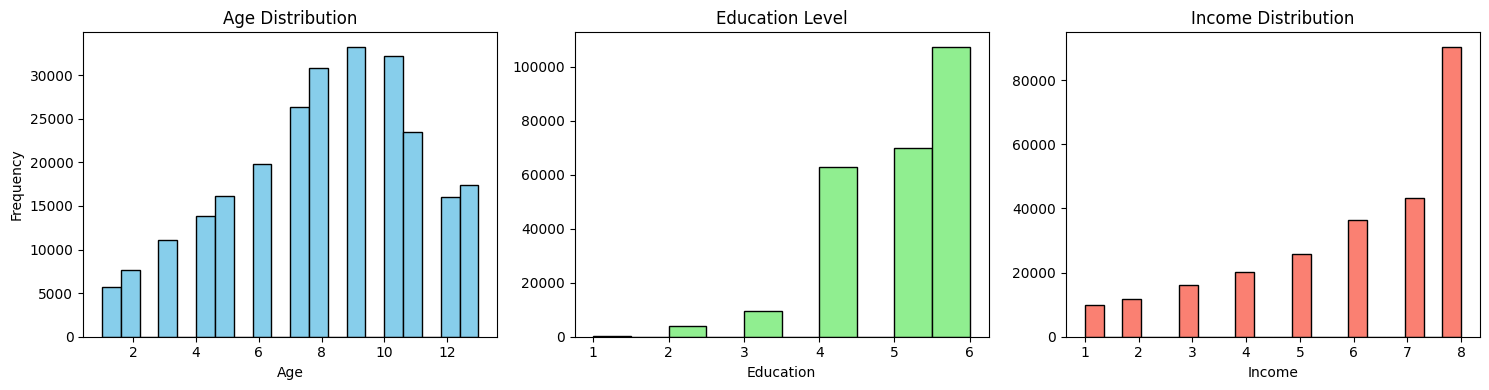

In [63]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

axes[0].hist(df['Age'], bins=20, color='skyblue', edgecolor='black')
axes[0].set_title('Age Distribution')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')

axes[1].hist(df['Education'], bins=10, color='lightgreen', edgecolor='black')
axes[1].set_title('Education Level')
axes[1].set_xlabel('Education')

axes[2].hist(df['Income'], bins=20, color='salmon', edgecolor='black')
axes[2].set_title('Income Distribution')
axes[2].set_xlabel('Income')

plt.tight_layout()
plt.show()

It shows the patient are mostly educated, have mostly high incomes and are mostly middle aged (40 to 70).

We can print exactly the number of patient having diabetes :

In [64]:
df["Diabetes_binary"].value_counts()

Diabetes_binary
0.0    218334
1.0     35346
Name: count, dtype: int64

It is interersting to see the correlation between features. Here we choose features that seems more relevant than others to determine if a patient has diabetes to keep the correlation matrix readable.

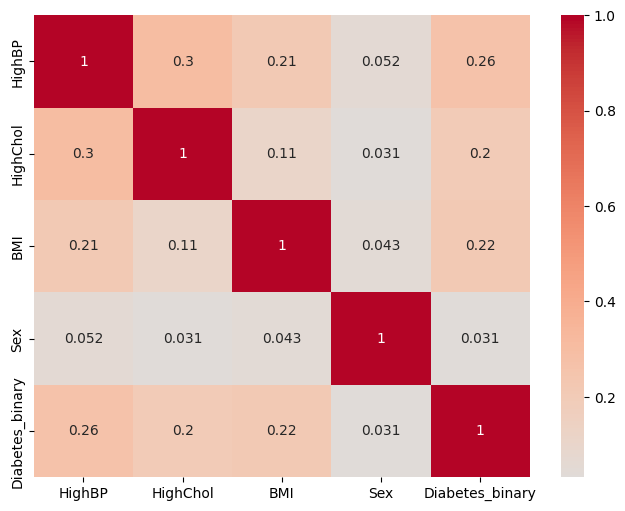

In [65]:
relevant_features = ['HighBP', 'HighChol', 'BMI', 'Sex', 'Diabetes_binary']
corr = df[relevant_features].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.show()

We can see the distribution of each feature on diabetics and no diabetics

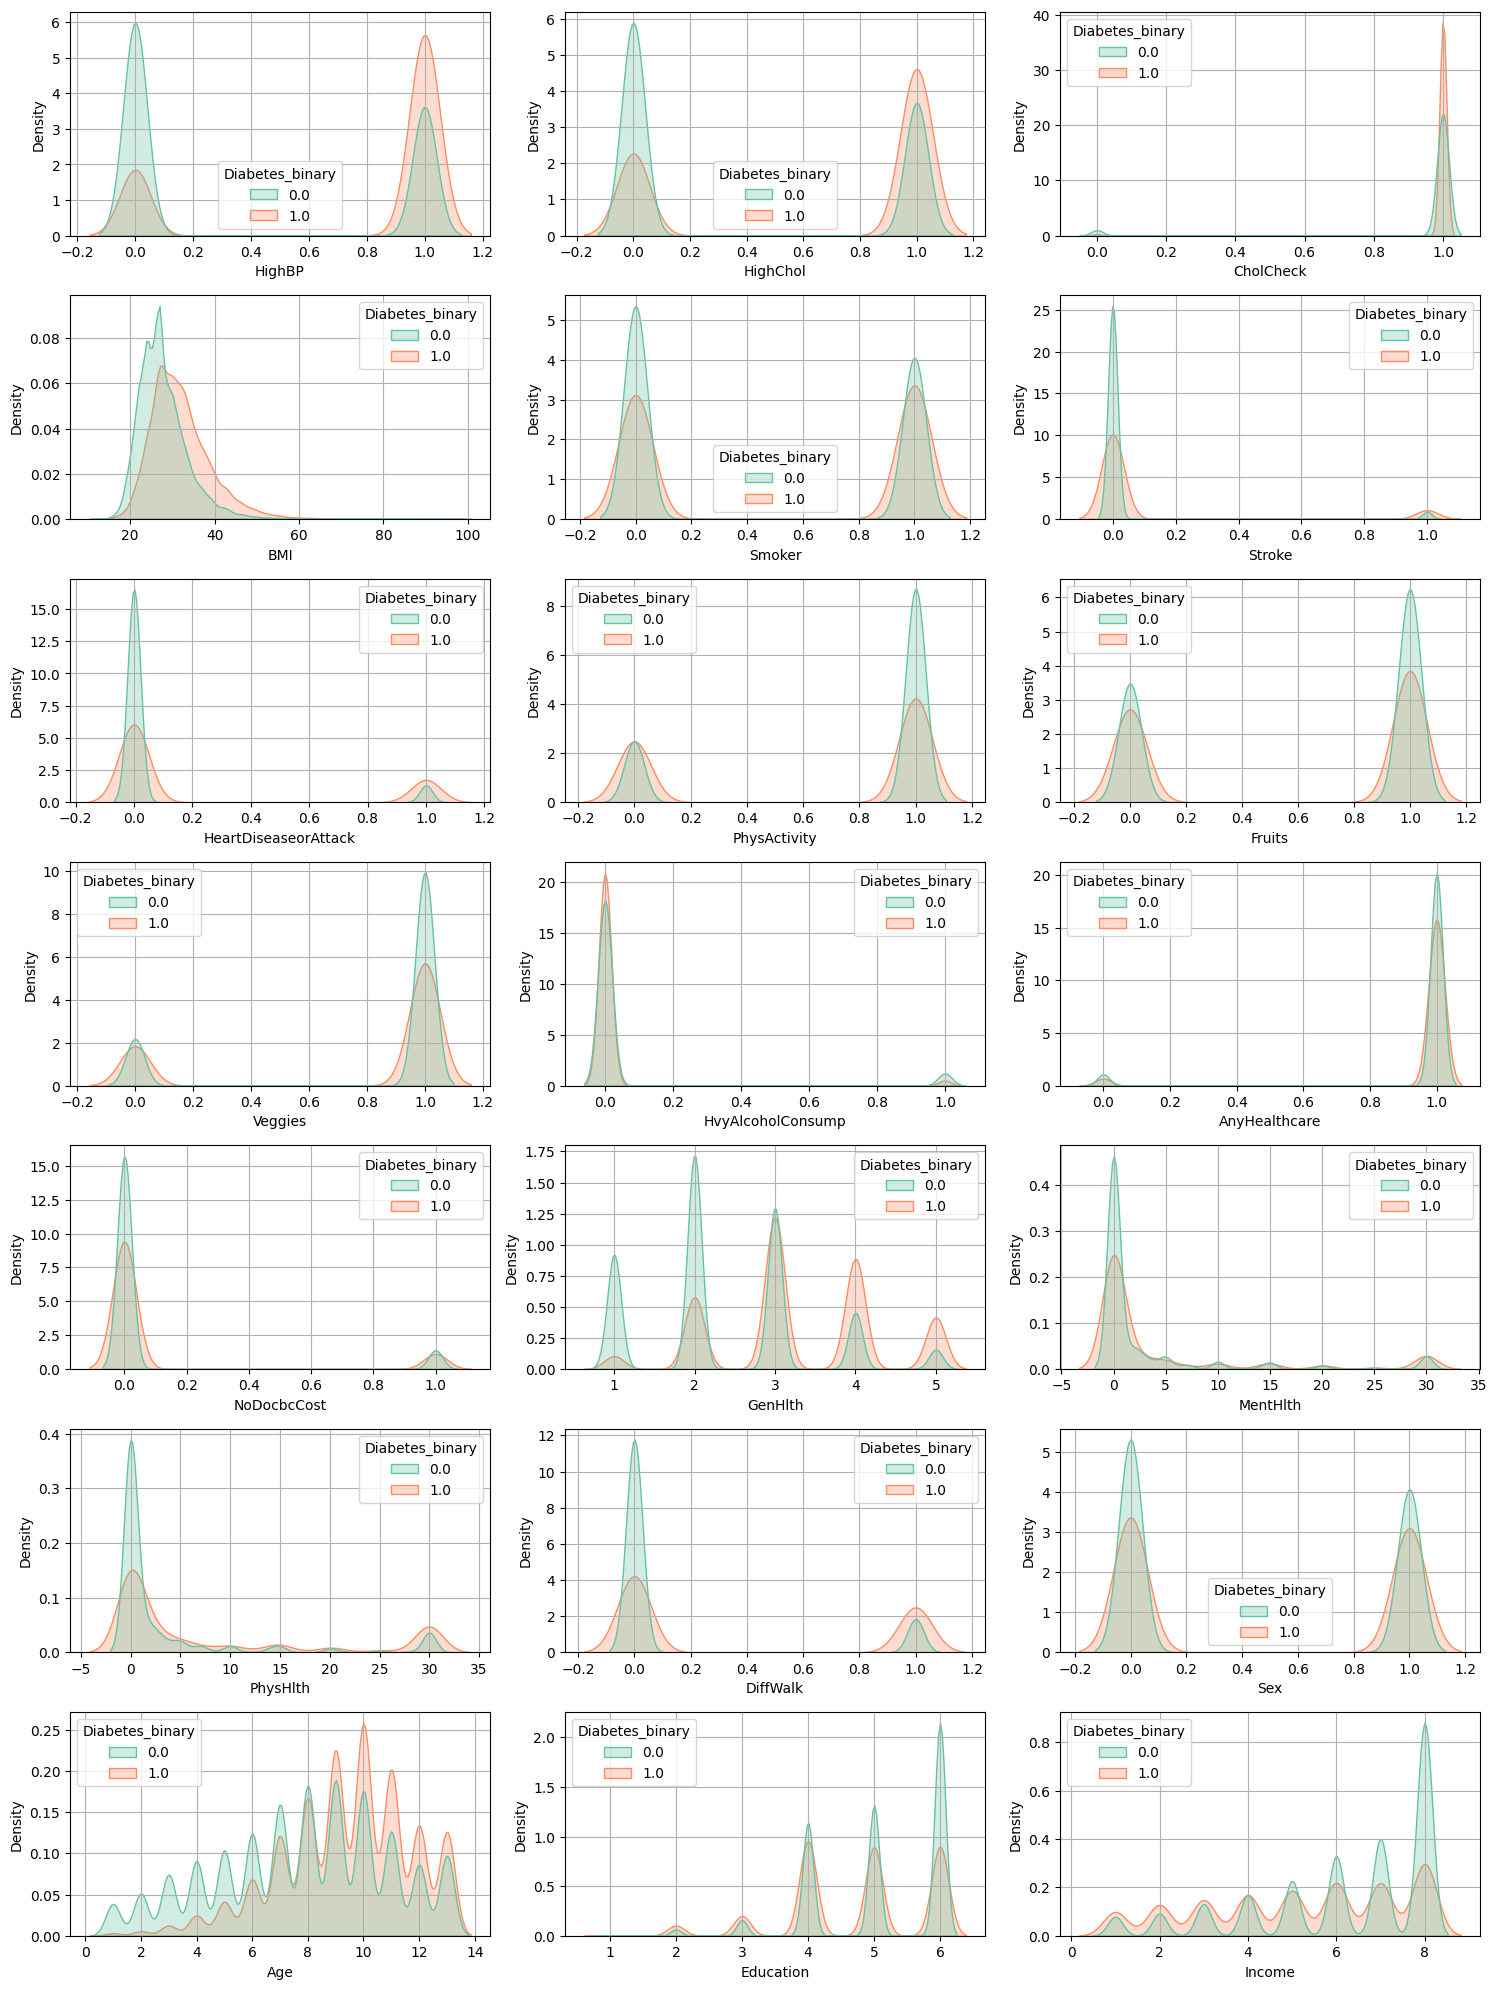

In [70]:
fig, axes = plt.subplots(7, 3, figsize=(15, 20))
axes = axes.flatten()
for idx, feature in enumerate(df.columns[1:]):
    sns.kdeplot(data=df, x=feature, hue='Diabetes_binary', ax=axes[idx], fill=True, palette='Set2', alpha=0.3, common_norm=False)    
    axes[idx].grid(True)
plt.tight_layout()
plt.show()